In [2]:
from osgeo import gdal
import rasterio
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [6]:
#input the file
filename = r"C:\Users\RAMBABU\Geopandas\ICRISAT_SUBSET_AVIRIS_recta.tiff"

In [7]:
dataset = rasterio.open(filename)
print (dataset)
Crs = dataset.crs
trans = dataset.transform
cols = dataset.width
rows = dataset.height
bands= dataset.count
print(cols,rows,bands)

RasterioIOError: C:/Users/RAMBABU/Geopandas/ICRISAT_SUBSET_AVIRIS_recta.tiff: No such file or directory

In [11]:
with rasterio.open(filename) as r:
    raster_matrix_image= r.read()

In [19]:
raster_matrix_image

array([[[0.01892014, 0.02047443, 0.02387672, ..., 0.03505928,
         0.04370148, 0.05369781],
        [0.02332303, 0.01710531, 0.01563499, ..., 0.03487646,
         0.04969331, 0.05301366],
        [0.01608105, 0.02226446, 0.0174295 , ..., 0.0383708 ,
         0.05212719, 0.05024039],
        ...,
        [0.02002913, 0.02424603, 0.01562819, ..., 0.04038047,
         0.04305585, 0.04391   ],
        [0.02002913, 0.01565598, 0.01576228, ..., 0.04355494,
         0.04663776, 0.04107638],
        [0.02295648, 0.02743126, 0.02357369, ..., 0.04796265,
         0.05109736, 0.04460568]],

       [[0.01971188, 0.02233628, 0.02385788, ..., 0.03719409,
         0.05476528, 0.06218141],
        [0.02516493, 0.02144577, 0.01658945, ..., 0.03830265,
         0.05842158, 0.06058047],
        [0.01997572, 0.02268633, 0.01832113, ..., 0.0394054 ,
         0.06237953, 0.05693208],
        ...,
        [0.02165859, 0.0240066 , 0.01854935, ..., 0.04326194,
         0.04479964, 0.04220402],
        [0.0

In [14]:
raster_matrix_image.T.shape

(432, 809, 372)

In [18]:
raster_matrix_image.T

array([[[0.01892014, 0.01971188, 0.01993705, ..., 0.74014634,
         0.1640461 , 0.11123091],
        [0.02332303, 0.02516493, 0.02555352, ..., 0.37191758,
         0.19558397, 0.11018278],
        [0.01608105, 0.01997572, 0.01995101, ..., 1.0167122 ,
         0.4202781 , 0.11895576],
        ...,
        [0.02002913, 0.02165859, 0.02223661, ..., 0.3814096 ,
         0.34703657, 0.0839695 ],
        [0.02002913, 0.02165859, 0.02223661, ..., 0.3814096 ,
         0.34703657, 0.0839695 ],
        [0.02295648, 0.02348269, 0.02519187, ..., 0.6016764 ,
         0.2917932 , 0.09091797]],

       [[0.02047443, 0.02233628, 0.02651513, ..., 0.6903101 ,
         0.4167114 , 0.07110311],
        [0.01710531, 0.02144577, 0.02644374, ..., 0.56585264,
         0.27232236, 0.1098724 ],
        [0.02226446, 0.02268633, 0.02560825, ..., 0.39780217,
         0.24380651, 0.10784967],
        ...,
        [0.02424603, 0.0240066 , 0.0267552 , ..., 0.36423   ,
         0.14017217, 0.06119797],
        [0.0

In [16]:
from spectral import *


In [21]:
(m, c) = kmeans(raster_matrix_image.T, 20, 30)

spectral:INFO: k-means iteration 1 - 333496 pixels reassigned.
spectral:INFO: k-means iteration 2 - 26830 pixels reassigned.
spectral:INFO: k-means iteration 3 - 22511 pixels reassigned.
spectral:INFO: k-means iteration 4 - 20377 pixels reassigned.
spectral:INFO: k-means iteration 5 - 20036 pixels reassigned.
spectral:INFO: k-means iteration 6 - 20356 pixels reassigned.
spectral:INFO: k-means iteration 7 - 19907 pixels reassigned.
spectral:INFO: k-means iteration 8 - 19061 pixels reassigned.
spectral:INFO: k-means iteration 9 - 18712 pixels reassigned.
spectral:INFO: k-means iteration 10 - 17582 pixels reassigned.
spectral:INFO: k-means iteration 11 - 15220 pixels reassigned.
spectral:INFO: k-means iteration 12 - 13173 pixels reassigned.
spectral:INFO: k-means iteration 13 - 12425 pixels reassigned.
spectral:INFO: k-means iteration 14 - 12124 pixels reassigned.
spectral:INFO: k-means iteration 15 - 12027 pixels reassigned.
spectral:INFO: k-means iteration 16 - 12203 pixels reassigned.


In [22]:
import matplotlib.pyplot as plt

ImageView object:
  Interpolation       :  <default>

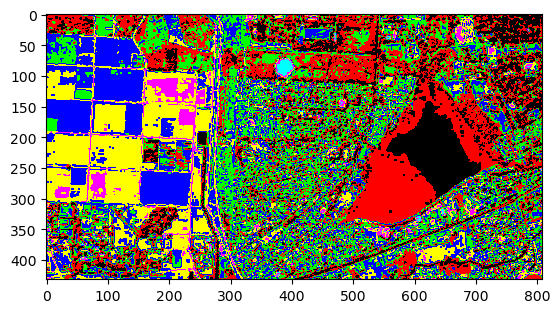

In [25]:
imshow(classes=m)

In [26]:
nir = raster_matrix_image[75,:,:]
red = raster_matrix_image[55,:,:]

In [27]:
dinom = nir+red
numer = nir-red
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [28]:
ndvi = np.where(dinom==0.0, 0.0, numer/dinom)

In [1]:
ndvi.flatten().max()

NameError: name 'ndvi' is not defined

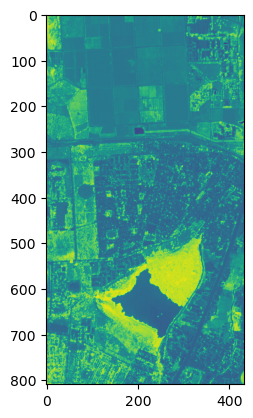

In [29]:
plt.figure()
plt.imshow(ndvi)

In [30]:
ndvi

array([[0.6149745 , 0.655755  , 0.620469  , ..., 0.29026115, 0.13362366,
        0.08993846],
       [0.60030735, 0.6540214 , 0.64515644, ..., 0.25971165, 0.11219817,
        0.10026593],
       [0.59203   , 0.6448939 , 0.6475194 , ..., 0.21792606, 0.08894223,
        0.12665135],
       ...,
       [0.59868693, 0.5465521 , 0.6541558 , ..., 0.635642  , 0.5716115 ,
        0.5195958 ],
       [0.59868693, 0.6349555 , 0.6775626 , ..., 0.5895905 , 0.48752564,
        0.5211749 ],
       [0.6692221 , 0.59801656, 0.6433889 , ..., 0.34713164, 0.26615232,
        0.47526085]], dtype=float32)

In [31]:
np.amin(nir.flatten())

0.045735013

In [32]:
red

array([[0.07099458, 0.06143613, 0.05734888, ..., 0.13244835, 0.21939227,
        0.25053266],
       [0.06988937, 0.05918094, 0.05424811, ..., 0.14559056, 0.23485216,
        0.2410988 ],
       [0.0768823 , 0.05925829, 0.05435154, ..., 0.17246483, 0.25088245,
        0.22108358],
       ...,
       [0.05768237, 0.05245089, 0.05042381, ..., 0.07901611, 0.08232311,
        0.08475831],
       [0.05768237, 0.05077089, 0.05072907, ..., 0.08697969, 0.09732051,
        0.0885402 ],
       [0.05346703, 0.04812444, 0.04900312, ..., 0.12253389, 0.13788813,
        0.10387705]], dtype=float32)

In [33]:
out_meta = dataset.meta.copy()

out_meta.update({'driver':'GTiff',
                 'width':dataset.shape[1],
                 'height':dataset.shape[0],
                 'count':1,
                 'dtype':'float64',
                 'crs':dataset.crs, 
                 'transform':dataset.transform,
                 'nodata':0})

In [34]:

with rasterio.open(fp=r'ndvi1.tif', #outputpath_name
             mode='w',**out_meta) as dst:
             dst.write(ndvi, 1) # the numer one is the number of bands

with rasterio.open(fp=r'ndvi1.tif', # outputpath_name
             mode='w',**out_meta) as dst:
             dst.write_band(1,ndvi) # the numer one is the number of bands

In [37]:
training = r"C:\Users\RAMBABU\Geopandas\avi.tiff"

In [40]:
classes = create_training_classes(raster_matrix_image.T, training)

AttributeError: 'str' object has no attribute 'ravel'